<a href="https://colab.research.google.com/github/JosephFalconio/Joseph-Falconio_dissertation/blob/main/IMD_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

#  Load IMD datasets
imd_2010 = pd.read_csv('/content/IMD_2010_converted_2021_LSOA.csv')  # contains LSOA21CD and IMD_2010_in_2021_LSOA
imd_2015 = pd.read_csv('/content/IMD_2015_converted_2021_LSOA (2).csv')  # contains LSOA21CD and IMD_2015_in_2021_LSOA
imd_2019 = pd.read_csv('/content/IMD_2019_converted_2021_LSOA (1).csv')  # contains LSOA21CD and IMD_2019_in_2021_LSOA

# Rename IMD columns to reflect actual year
imd_2010 = imd_2010.rename(columns={'IMD_2010_in_2021_LSOA': 'IMD_2010'})
imd_2015 = imd_2015.rename(columns={'IMD_2019_in_2021_LSOA': 'IMD_2015'})
imd_2019 = imd_2019.rename(columns={'IMD_2019_in_2021_LSOA': 'IMD_2019'})

#  Merge on LSOA21CD
df = imd_2010.merge(imd_2015, on='LSOA21CD').merge(imd_2019, on='LSOA21CD')

#  Calculate absolute change
df['IMD_Change_2010_2019'] = df['IMD_2019'] - df['IMD_2010']
df['IMD_Change_2015_2019'] = df['IMD_2019'] - df['IMD_2015']

#  Export final dataset
df.to_csv('imd_merged_with_absolute_changes.csv', index=False)
print("IMD data merged and absolute changes calculated.")



✅ IMD data merged and absolute changes calculated.


In [ ]:
#ELE
#  Define ELE LSOA list
ele_lsoas = [
    'E01011715', 'E01011719', 'E01011714', 'E01011716', 'E01011717', 'E01011718',
    'E01011720', 'E01011721', 'E01011722', 'E01011723', 'E01011724',
    'E01011406', 'E01011407', 'E01011408', 'E01011409', 'E01011410',
    'E01011412', 'E01011411'
]

# Filter merged IMD dataframe
ele_imd = df[df['LSOA21CD'].isin(ele_lsoas)].copy()

# Export to CSV
ele_imd.to_csv('imd_change_ELE_LSOAs.csv', index=False)
print("Exported IMD change data for ELE LSOAs.")


📁 Exported IMD change data for ELE LSOAs.


In [ ]:
#Top 10 2011-2021
# Define top 10 urban growth LSOAs (2011–2021)
top_growth_lsoas = [
    'E01011516', 'E01011515', 'E01011323', 'E01011693', 'E01011673',
    'E01011276', 'E01011632', 'E01011735', 'E01011293', 'E01011283'
]

#  Filter merged IMD dataframe
top_growth_imd = df[df['LSOA21CD'].isin(top_growth_lsoas)].copy()

# Export to CSV
top_growth_imd.to_csv('imd_change_top10_growth_LSOAs.csv', index=False)
print("Exported IMD change data for top 10 urban growth LSOAs.")


📁 Exported IMD change data for top 10 urban growth LSOAs.


In [ ]:
# Mean vlaues

# Mean IMD change for all Leeds LSOAs
mean_all_2010_2019 = df['IMD_Change_2010_2019'].mean()
mean_all_2015_2019 = df['IMD_Change_2015_2019'].mean()

#  Mean IMD change for ELE LSOAs
mean_ele_2010_2019 = ele_imd['IMD_Change_2010_2019'].mean()
mean_ele_2015_2019 = ele_imd['IMD_Change_2015_2019'].mean()

# Mean IMD change for top 10 urban growth LSOAs
mean_top10_2010_2019 = top_growth_imd['IMD_Change_2010_2019'].mean()
mean_top10_2015_2019 = top_growth_imd['IMD_Change_2015_2019'].mean()

# Print results
print("Mean IMD Change (2010–2019):")
print(f"All Leeds LSOAs: {mean_all_2010_2019:.2f}")
print(f"ELE LSOAs:       {mean_ele_2010_2019:.2f}")
print(f"Top 10 Growth:   {mean_top10_2010_2019:.2f}\n")

print("Mean IMD Change (2015–2019):")
print(f"All Leeds LSOAs: {mean_all_2015_2019:.2f}")
print(f"ELE LSOAs:       {mean_ele_2015_2019:.2f}")
print(f"Top 10 Growth:   {mean_top10_2015_2019:.2f}")


📊 Mean IMD Change (2010–2019):
All Leeds LSOAs: -0.64
ELE LSOAs:       -0.72
Top 10 Growth:   -0.60

📊 Mean IMD Change (2015–2019):
All Leeds LSOAs: -0.13
ELE LSOAs:       -0.17
Top 10 Growth:   -0.30


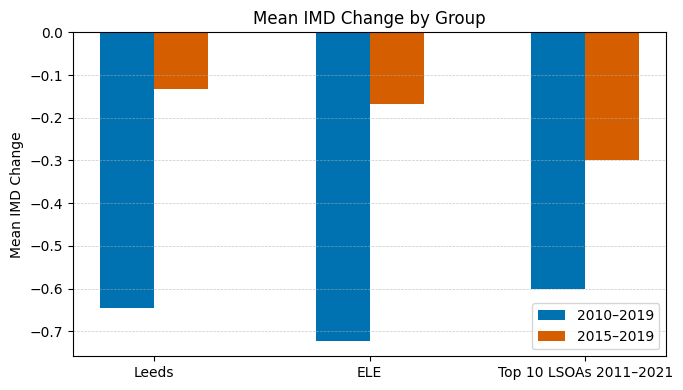

In [ ]:
import matplotlib.pyplot as plt

# Updated labels
labels = ["Leeds", "ELE", "Top 10 LSOAs 2011–2021"]

imd_2010_2019 = [mean_all_2010_2019, mean_ele_2010_2019, mean_top10_2010_2019]
imd_2015_2019 = [mean_all_2015_2019, mean_ele_2015_2019, mean_top10_2015_2019]

x = range(len(labels))
width = 0.25  # Thinner bars

# Colorblind friendly palette
color_2010_2019 = "#0072B2"
color_2015_2019 = "#D55E00"

plt.figure(figsize=(7, 4))
plt.bar([i - width/2 for i in x], imd_2010_2019, width=width, label="2010–2019", color=color_2010_2019)
plt.bar([i + width/2 for i in x], imd_2015_2019, width=width, label="2015–2019", color=color_2015_2019)

plt.xticks(x, labels)
plt.ylabel("Mean IMD Change")
plt.title("Mean IMD Change by Group")
plt.legend()

# Add horizontal grid lines
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)

plt.tight_layout()
plt.show()

